In [6]:
import os, time
from vjpy import VjPyDevice, MidiDevice, WavDevice, VideoDevice, patterns
from vjpy import Drumkit, Drum
from scipy.io.wavfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import random
vj = VjPyDevice(bpm=108)
md = MidiDevice(vj)
wd = WavDevice(vj)
vd = VideoDevice(vj, bankname="drums_03", beatname="15")

In [14]:
# Make a video object
test_n = '07'
videoclip = vd.make_videoclip()
filepath = vd.wav_file
wav_object, Fs = librosa.load(filepath)
sample_rate = 22050
frames_per_second = 60/sample_rate
peaks = wd.find_local_energy_peaks(filepath, sample_rate=sample_rate, prominence=35) #12: 16 peaks


Found 8 peaks.


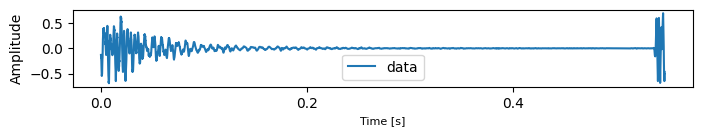

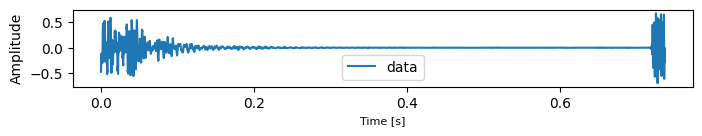

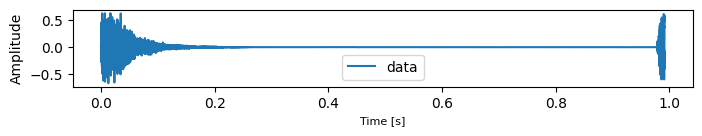

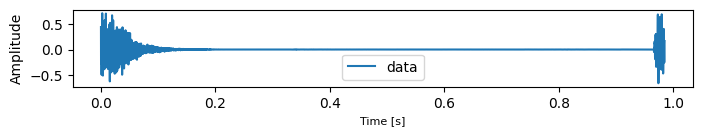

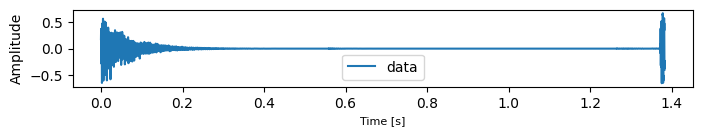

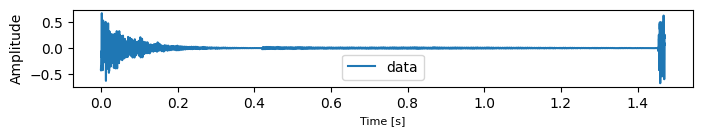

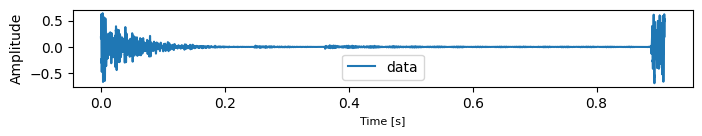

IndexError: index 8 is out of bounds for axis 0 with size 8

In [18]:
# Make a video subclip
subclips = []
for n, peak in enumerate(peaks):
    start_s = round(peak/sample_rate, 4)
    end = peaks[n+1]
    wav_chunk = wav_object[peak:end]
    wd.plot_wav(wav_chunk)
    ipd.display(ipd.Audio(wav_chunk, rate=Fs))
    subclips.append(vd.get_subclip(videoclip, start=x))

In [10]:
random_pattern1 = []
for _ in range(16):
    random_pattern1.append(random.choice(subclips))    
random_pattern2 = []
for _ in range(16):
    random_pattern2.append(random.choice(subclips))  
random_pattern3 = []
for _ in range(8):
    random_pattern3.append(random.choice(subclips))   
    random_pattern4 = []
for _ in range(8):
    random_pattern4.append(random.choice(subclips))   

In [29]:
random_patterns = random_pattern1*4+random_pattern2*2+random_pattern3*4#+random_pattern4*4

c = vd.concatenate_subclips(random_patterns*2)
vd.write_concatenated_subclips(c, f'c_test_{test_n}.mp4')

Moviepy - Building video c_test_06.mp4.
MoviePy - Writing audio in c_test_06TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video c_test_06.mp4



Moviepy - Done !
Moviepy - video ready c_test_06.mp4


onset: 1.627


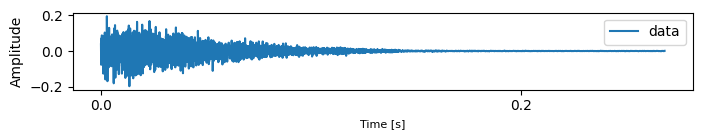

onset: 2.2403


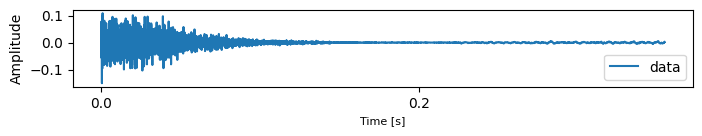

onset: 3.0271


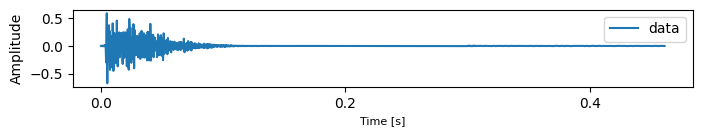

onset: 4.0266


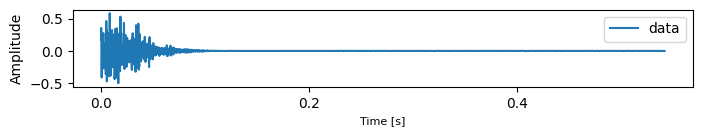

onset: 5.1875


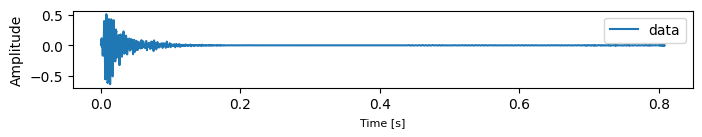

onset: 6.8814


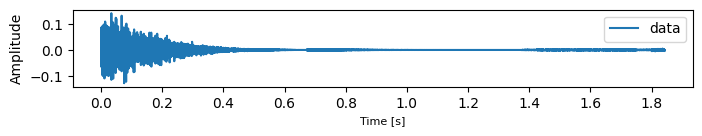

onset: 10.6446


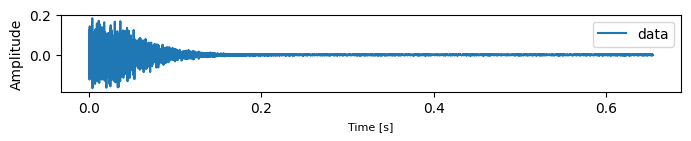

onset: 12.0316


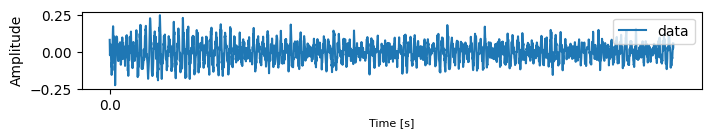

In [5]:
wav_object, Fs = librosa.load(filepath)
for n, peak in enumerate(peaks[:8]):
    try:
        start_s = round(peak/sample_rate, 4)
        print(f'onset: {start_s}')
        start_adj = 500
        end_adj = 2200 # 0.0227 s
        end = peaks[n+1]-end_adj
        wav_chunk = wav_object[peak-start_adj:end]
        wav_chunk_name = os.path.join(wd.wav_dir, "examples", "peaks", f'peak_{n}.wav')
        wd.plot_wav(wav_chunk)
        write(wav_chunk_name, sample_rate, wav_chunk)
        ipd.display(ipd.Audio(wav_chunk, rate=Fs))
        time.sleep(.5)
    except:
        pass